|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Q2: Read instagram_users.csv file

In [2]:
instagram=pd.read_csv('instagram_users.csv')

# Q3: Split tha dataset into training and testing

In [3]:
x=instagram.drop('real_fake',axis=1)
y=instagram['real_fake']


In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

Decision Tree
accuracy =  0.8525474732800664
confusion =  [[8087 1386]
 [1456 8345]]


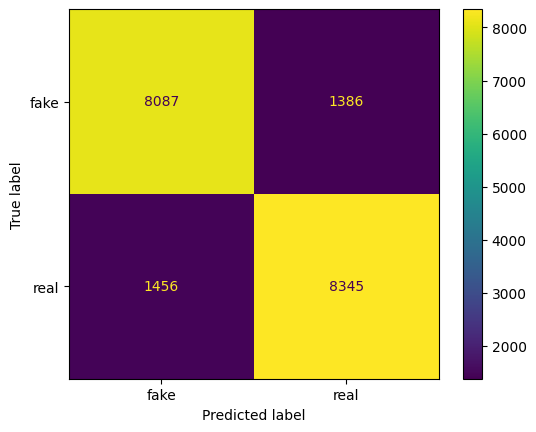

In [5]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib as plt
print ('Decision Tree')
#building 
Dec=DecisionTreeClassifier()
#train 
Dec.fit(x_train,y_train)
#prediction
pred=Dec.predict(x_test)
#accuracy
print('accuracy = ',accuracy_score(y_test,pred))
#confusion.
print('confusion = ', confusion_matrix(y_test,pred))
#plot confusion
plot_confusion_matrix(Dec,x_test,y_test)

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

Random Forests
accuracy =  0.8950399501919685
confusion =  [[7899 1574]
 [ 449 9352]]


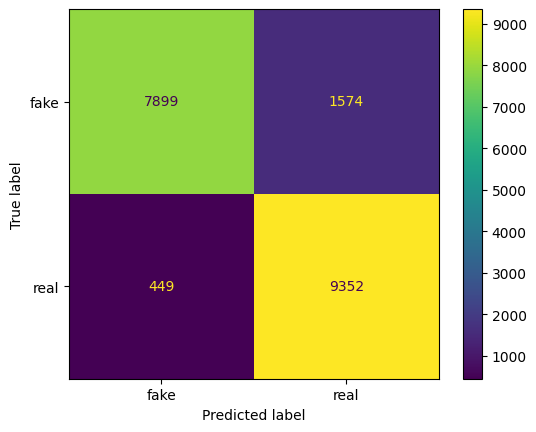

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print ('Random Forests')
#building 
#default=”gini”,
Rfc=RandomForestClassifier()
#train 
Rfc.fit(x_train,y_train)
#prediction
pred=Rfc.predict(x_test)
#accuracy
print('accuracy = ',accuracy_score(y_test,pred))
#confusion.
print('confusion = ', confusion_matrix(y_test,pred))
#plot confusion
plot_confusion_matrix(Rfc,x_test,y_test)

## Q4.3: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

Logistic Regression
accuracy =  0.7627373664003321
confusion =  [[6574 2899]
 [1674 8127]]


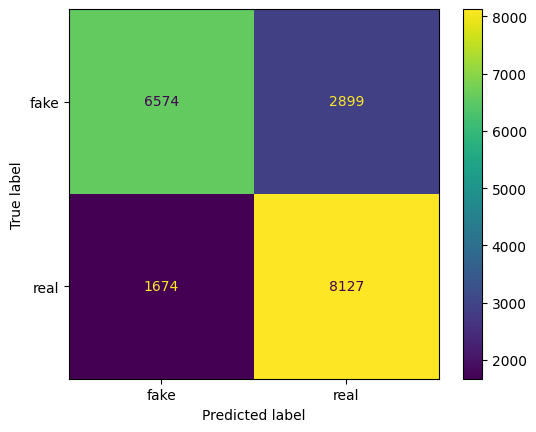

In [9]:
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print ('Logistic Regression')
#building 
#default=”gini”,
LR=LogisticRegression()
#train 
LR.fit(x_train,y_train)
#prediction
pred=LR.predict(x_test)
#accuracy
print('accuracy = ',accuracy_score(y_test,pred))
#confusion.
print('confusion = ', confusion_matrix(y_test,pred))
#plot confusion
plot_confusion_matrix(LR,x_test,y_test)

# Resource 
# https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/